In [15]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [16]:
file_path = "datasets/DCASE2025T2/Development/ToyCar/train/section_00_source_train_normal_0000_car_D2_spd_40V_mic_1.wav"
amp, sr = librosa.load(file_path, sr=None)

In [19]:
stft = librosa.stft(amp, n_fft=1024, hop_length=512)
stft = librosa.amplitude_to_db(abs(stft), ref=np.max)

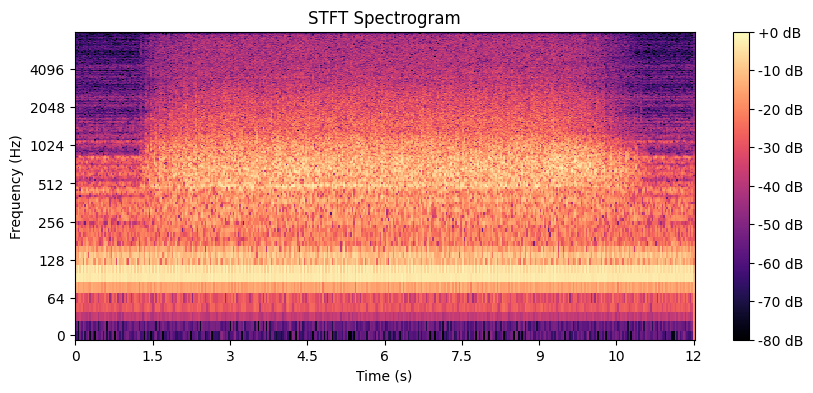

In [20]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()